### WARNING
Please refrain from using **print statements/anything that dumps large outputs(>500 lines) to STDOUT** to avoid running to into **memory issues**. 
Doing so requires your entire lab to be reset which may also result in loss of progress and you will be required to reach out to Coursera for assistance with this.
This process usually takes time causing delays to your submission.

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

N.B.: I recommend that you use the `statsmodel` library to do the regression analysis as opposed to *e.g.* `sklearn`. The `sklearn` library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

# 1.  Polynomial regression using MPG data [25 pts, Peer Review]
We will be using Auto MPG data from UCI datasets (https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to study polynomial regression.

In [19]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("data/auto-mpg.data", header=None, delimiter=r"\s+", names=columns) 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1a) Clean the data [5 pts] 

1. Fix data types
2. Remove null or undefined values 
3. Drop the column car_name

Replace the data frame with the cleaned data frame. Do not change the column names, and do not add new columns.

Hint: 1. Dtype of one column is incorrect.  

In [21]:
# replace data frame with cleaned data frame
# fix data types, remove null or undefined values, drop the column car_name
# NOTE: do not change the column names or add new columns 
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.isna().sum())
print(df.loc[df.isnull().any(axis=1)])
df.dropna(inplace=True)
df.drop('car_name', axis=1, inplace=True)
df.head()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name]
Index: []


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [22]:
# this cell will test that you properly cleaned the dataframe 

### 1b) Fit a simple linear regression model with a feature that maximizes $R^2$. [5 pts]
Which feature is the best predictor, and the resulting r-squared value? Update your answer below.

In [31]:
predictors = df.columns[1:].to_list()
results = {}
for p in predictors:
    formula = f'mpg ~ {p}'
    model = smf.ols(formula=formula, data=df).fit()
    R2 = float(model.rsquared)
    results[p] = R2
results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))
for k, v in results.items():
    print(f"{k}: {v}")

best_predictor=max(results, key=results.get)
best_r_squared=results[best_predictor]
print(f"Best predictor: {best_predictor}")
print(f"Best r-squared: {best_r_squared}")

weight: 0.6926304331206254
displacement: 0.6482294003193045
horsepower: 0.6059482578894348
cylinders: 0.6046889889441246
model_year: 0.3370278133096226
origin: 0.3194609386689675
acceleration: 0.1792070501562547
Best predictor: weight
Best r-squared: 0.6926304331206254


In [32]:
# this cell will test best_predictor and best_r_squared

### 1c) Using the feature found above (without normalizing), fit polynomial regression up to N=10 and report $R^2$. Which polynomial degree gives the best result? [10 pts]
Hint: For N-degree polynomial fit, **you have to include all orders upto N**. Use a for loop instead of running it manually. The `statsmodels.formula.api` formula string can understand **`np.power(x,n)`** function to include a feature representing $x^n$.

For example, the formula for n = 4 ---> mpg ~ weight + np.power(weight,2) + np.power(weight,3) + np.power(weight,4)

In [46]:
# return updated best_degree and best_r_squared 
# best_degree = 1
# best_r_squared = 0
def polyfit(best_predictor, data, N=10):
    results = {}
    for n in range(N):
        degree = n + 1
        formula_terms = [best_predictor] + [f'np.power({best_predictor},{i})' for i in range(2, degree+1)]
        formula = 'mpg ~ ' + '+'.join(formula_terms)
        model = smf.ols(formula=formula, data=data).fit()
        print(model.summary())
        results[degree] = model.rsquared
    return results

results = polyfit(best_predictor, df)
for k, v in results.items():
    print(f"{k}: {v}")

best_degree = max(results, key=results.get)
best_r_squared=results[best_degree]
print(f"Best degree: {best_degree}")
print(f"Best r-squared: {best_r_squared}")

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 02 Sep 2025   Prob (F-statistic):          6.02e-102
Time:                        11:59:32   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.2165      0.799     57.867      0.0

In [39]:
# this cell tests best_degree and best_r_squared 

### 1d) Now, let's make a new feature called 'weight_norm' which is weight normalized by the mean value. [5 pts]
Run training with polynomial models with polynomial degrees up to 20. Print out each polynomial degree and $R^2$ value. What do you observe from the result? What are the best_degree and best_r_qaured just based on $R^2$ value?
Inspect model summary from each model. What is the highest order model that makes sense (fill the value for the sound_degree)? 

Note: For N-degree polynomial fit, you have to include all orders upto N.

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 02 Sep 2025   Prob (F-statistic):          6.02e-102
Time:                        11:59:49   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      46.2165      0.799     57.867      

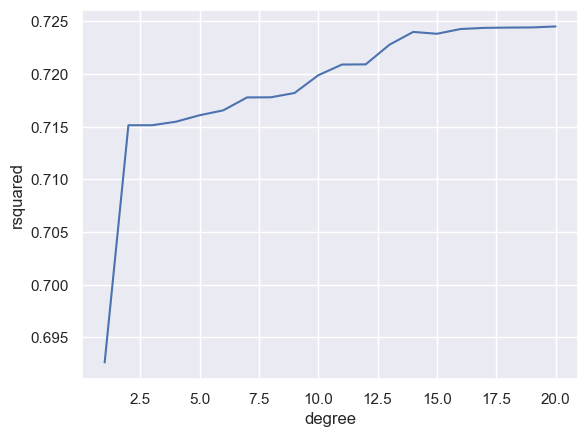

In [47]:
# best_degree = 1
# best_r_squared = 0 
# sound_degree = 1

df['weight_norm'] = df['weight']/df['weight'].mean()
results = polyfit('weight_norm', df,N=20)

for k, v in results.items():
    print(f"{k}: {v}")

plot_df = pd.DataFrame(list(results.items()), columns=['degree', 'rsquared'])
sns.lineplot(data=plot_df, x='degree', y='rsquared')
plt.show()

best_degree = 20
best_rsquared = results[best_degree]
sound_degree = 2

In [45]:
# tests best_degree, best_r_squared, and sound_degree

### TODO: 
Open the Peer Review assignment for this week to answer a question for section 1d. 

# 2. Multi-Linear Regression [15 pts, Peer Review]

In the following problem, you will construct a simple multi-linear regression model, identify interaction terms and use diagnostic plots to identify outliers in the data. The original problem is as described by John Verzani in the [excellent tutorial 'SimplR' on the R statistics language](https://cran.r-project.org/doc/contrib/Verzani-SimpleR.pdf) and uses data from the 2000 presidential election in Florida. The problem is interesting because it contains a small number of highly leveraged points that influence the model.

In [48]:
votes = pd.read_csv('data/fl2000.txt', delim_whitespace=True, comment='#')
votes = votes[['county', 'Bush', 'Gore', 'Nader', 'Buchanan']]
votes.describe(include='all')

/var/folders/kz/34dp2r_x2zlgffjysxmy1_1r0000gn/T/ipykernel_20806/1617688238.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  votes = pd.read_csv('data/fl2000.txt', delim_whitespace=True, comment='#')


,county,Bush,Gore,Nader,Buchanan
count,67,67.000000,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN,NaN
top,Alachua,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,43450.970149,43453.985075,1454.119403,260.880597
std,NaN,57182.620266,75070.435056,2033.620972,450.498092
min,NaN,1317.000000,789.000000,19.000000,9.000000
25%,NaN,4757.000000,3058.000000,95.500000,46.500000
50%,NaN,20206.000000,14167.000000,562.000000,120.000000
75%,NaN,56546.500000,46015.000000,1870.500000,285.500000


### 2a. Plot a pair plot of the data using the `seaborn` library. [Peer Review]
Upload a screenshot or saved copy of your plot for this week's Peer Review assignment.<br>
**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section after completing the Peer Review.

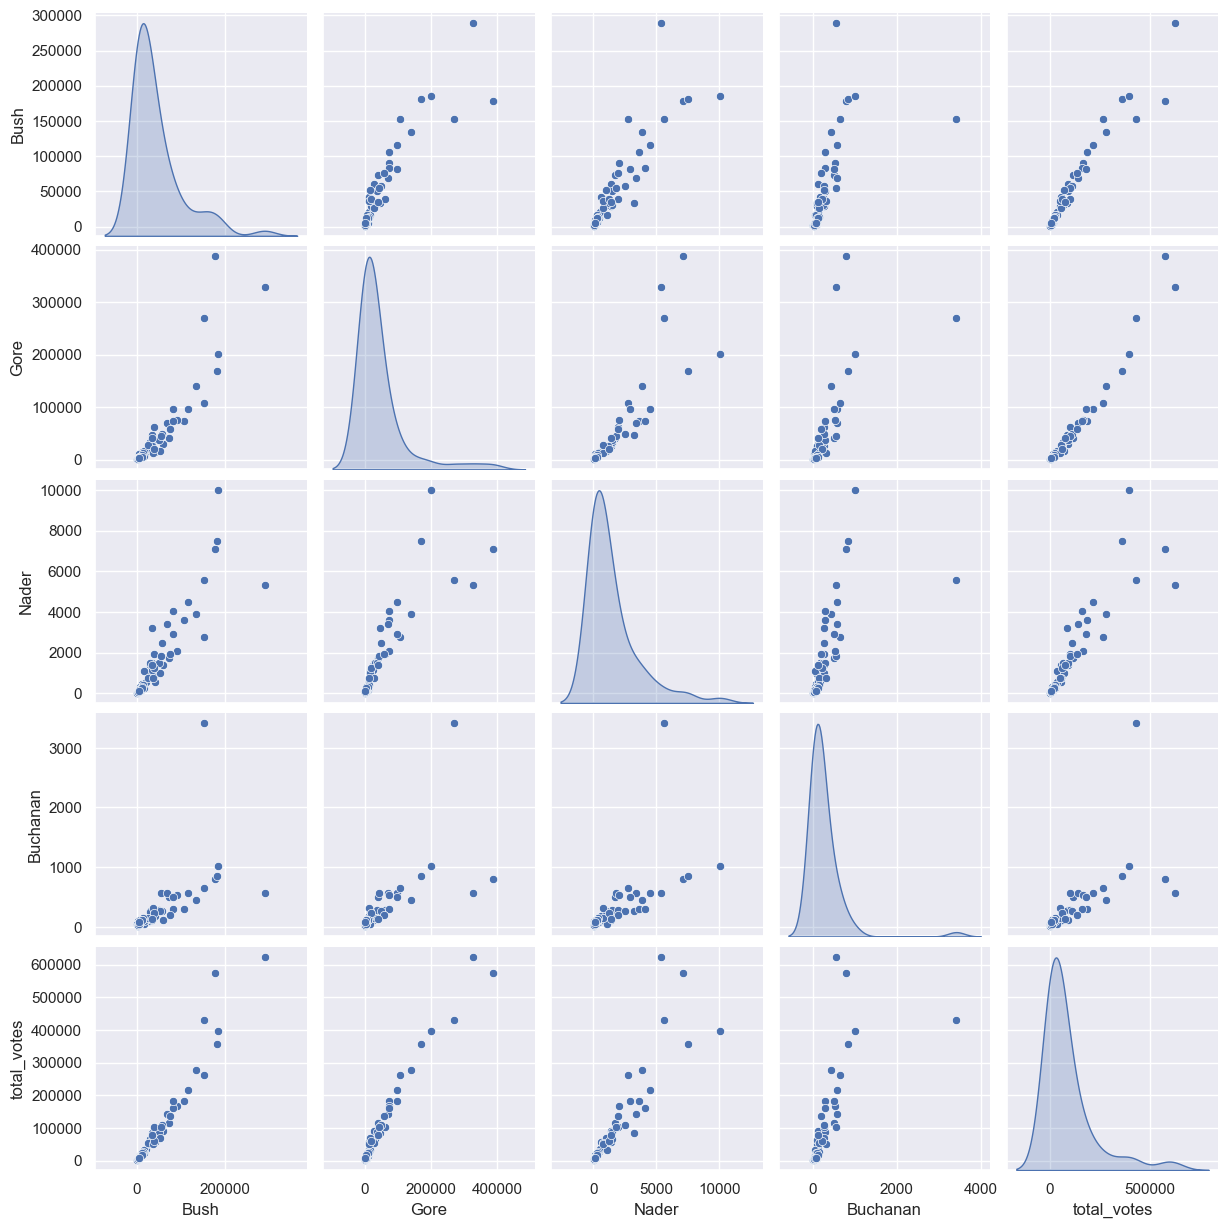

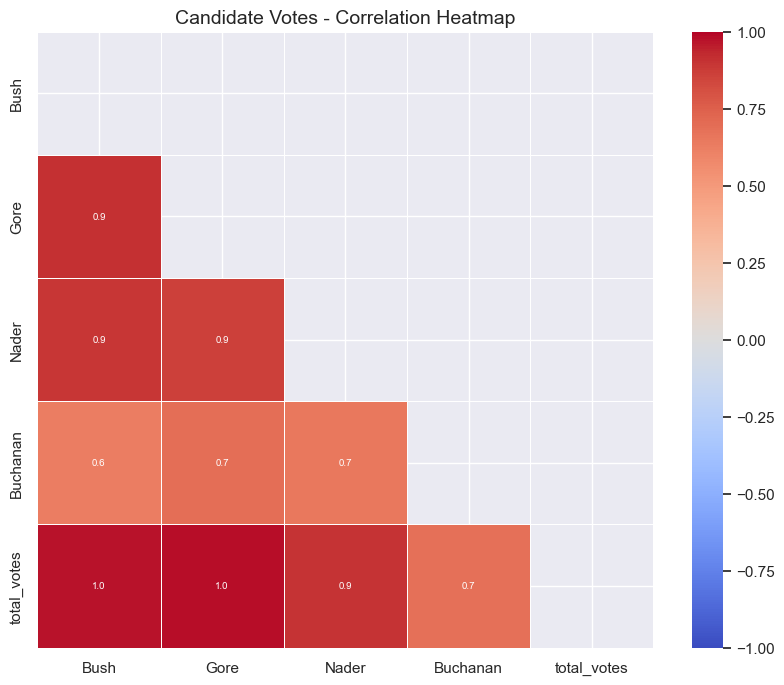

In [64]:
# plot a pair plot of the data using the seaborn library
pair_data = votes.columns[1:].to_list()
numeric_votes = votes.drop('county', axis=1)
numeric_votes['total_votes'] = numeric_votes.sum(axis=1)

sns.pairplot(
    numeric_votes,
    #vars=pair_data,
    diag_kind='kde'
    )

plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')
plt.show()

corr = numeric_votes.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
plt.title("Candidate Votes - Correlation Heatmap", fontsize=14)

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".1f",
    annot_kws={"size": 7},
    mask=mask,            # hide upper triangle
    linewidths=0.5,
    square=True
)

plt.show()

### 2b. Comment on the relationship between the quantiative datasets. Are they correlated? Collinear? [Peer Review]
You will answer this question in this week's Peer Review assignment.

### 2c. Multi-linear [5 pts, Peer Review]

Construct a multi-linear model called `model` without interaction terms predicting the Bush column on the other columns and print out the summary table. You should name your model's object as `model` in order to pass the autograder. Use the full data (not train-test split for now) and do not scale features.

In [59]:
# uncomment and construct a multi-linear model 
model = smf.ols(formula='Bush ~ Gore + Nader + Buchanan', data=votes).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           1.35e-28
Time:                        12:59:15   Log-Likelihood:                -758.33
No. Observations:                  67   AIC:                             1525.
Df Residuals:                      63   BIC:                             1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8647.6837   3133.545      2.760      0.0

In [65]:
# tests model

Is there any insignificant feature(s)? Explain your answer in this week's Peer Review assignment. 

### 2d. Multi-linear with interactions [Peer Review]

Construct a multi-linear model with interactions that are statistically significant at the $p = 0.05$ level. You can start with full interactions and then eliminate interactions that do not meet the $p = 0.05$ threshold. You will share your solution in this week's Peer Review assignment. 

Note: Name this model object as **`model_multi`**.

In [133]:
model_multi = smf.ols(formula='Bush ~ Gore + Nader + Buchanan + Nader:Buchanan + Gore:Nader:Buchanan', data=votes).fit()
print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     232.3
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.45e-38
Time:                        14:19:17   Log-Likelihood:                -728.06
No. Observations:                  67   AIC:                             1468.
Df Residuals:                      61   BIC:                             1481.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3739.5698   2

In [134]:
# tests model_multi

In [135]:
# tests model_multi 
# your code here


### 2e. Leverage [Peer Review]

Plot the *leverage* vs. the square of the residual.

These resources might be helpful    
- https://rpubs.com/Amrabdelhamed611/669768
- https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_leverage_resid2.html

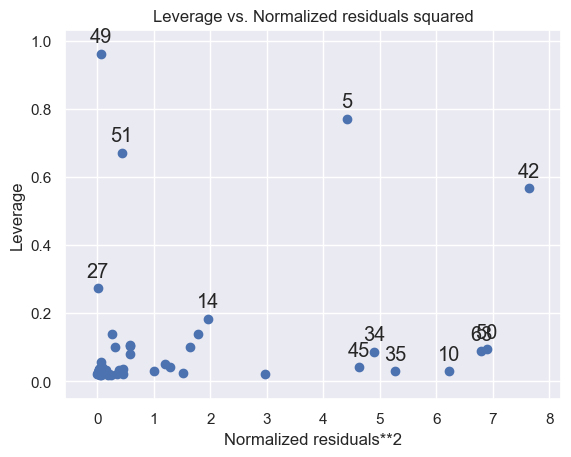

In [136]:
# plot the leverage vs. the square of the residual
sm.graphics.plot_leverage_resid2(model_multi)
plt.show()


In [71]:
# you can use this cell to try different plots 
# your code here


Upload your plot for this week's Peer Review assignment. If you tried out multiple models, upload a single model.

### 2f. Identify and Clean [5pts]

The leverage *vs* residual plot indicates that some rows have high leverage but small residuals and others have high residual. The $R^2$ of the model is determined by the residual. The data is from the disputed 2000 election [where one county](https://en.wikipedia.org/wiki/2000_United_States_presidential_election_recount_in_Florida) caused significant issues.

Display the *3 or more* rows for the points indicated having high leverage and/or high residual squared. You will use this to improve the model $R^2$.

Name the list of indices for those high-leverage and/or high-residual points as `unusual`.

In [138]:
# uncomment and fill unusual with list of indices for high-leverage and/or high-residual points
unusual = [42,5,49,63,50]
print(votes.loc[unusual])


       county    Bush    Gore  Nader  Buchanan
42  MiamiDade  289533  328808   5352       560
5     Broward  177902  387703   7104       795
49  PalmBeach  152951  269732   5565      3411
63    Volusia   82357   97304   2910       498
50      Pasco   68582   69564   3393       570


In [139]:
# tests your list of indices for high-leverage and/or high-residual points 

### 2g. Final model [5 pts]

Develop your final model by dropping *one or more* of the troublesome data points indicated in the leverage *vs* residual plot and insuring any interactions in your model are still significant at $p=0.05$. Your model should have an $R^2$ great than 0.95. Call your model `model_final`.

In [163]:
# develop your model_final here
clean_votes = votes.drop([42,5,63,50])
model_final = smf.ols(formula='Bush ~ Gore + Nader + Buchanan + Gore:Nader:Buchanan', data=clean_votes).fit()
print(model_final.summary())
clean_votes.head(10)


                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     283.1
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.52e-37
Time:                        14:36:15   Log-Likelihood:                -670.27
No. Observations:                  63   AIC:                             1351.
Df Residuals:                      58   BIC:                             1361.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -821.9032   2

,county,Bush,Gore,Nader,Buchanan
0,Alachua,34124,47365,3226,263
1,Baker,5610,2392,53,73
2,Bay,38637,18850,828,248
3,Bradford,5414,3075,84,65
4,Brevard,115185,97318,4470,570
6,Calhoun,2873,2155,39,90
7,Charlotte,35426,29645,1462,182
8,Citrus,29767,25525,1379,270
9,Clay,41736,14632,562,186
10,Collier,60450,29921,1400,122


In [164]:
# tests model_final


## 3. Body Mass Index Model [20 points, Peer Review]

In this problem, you will first clean a data set and create a model to estimate body fat based on the common BMI measure. Then, you will use the **forward stepwise selection** method to create more accurate predictors for body fat.

The body density dataset in file `bodyfat` includes the following 15 variables listed from left to right:
* Density : Density determined from underwater weighing
* Fat : Percent body fat from Siri’s (1956) equation
* Age : Age (years)
* Weight : Weight (kg)
* Height : Height (cm)
* Neck : Neck circumference (cm)
* Chest: Chest circumference (cm)
* Abdomen : Abdomen circumference (cm)
* Hip : Hip circumference (cm)
* Thigh : Thigh circumference (cm)
* Knee : Knee circumference (cm)
* Ankle : Ankle circumference (cm)
* Biceps : Biceps (extended) circumference (cm)
* Forearm : Forearm circumference (cm)
* Wrist : Wrist circumference (cm)

The `Density` column is the "gold standard" -- it is a measure of body density obtained by dunking people in water and measuring the displacement. The `Fat` column is a prediction using another statistical model. The body mass index (BMI) is [calculated as Kg/m^2](https://en.wikipedia.org/wiki/Body_mass_index) and is used to classify people into different weight categories with a [BMI over 30 being 'obese'](https://www.medicalnewstoday.com/info/obesity). You will find that BMI is a poor predictor of the `Density` information it purports to predict. You will try to find better models using measurements and regression.

Unfortunately for us, the dataset we have has imperial units for weight and height, so we will convert those to metric and then calculate the BMI and plot the KDE of the data.

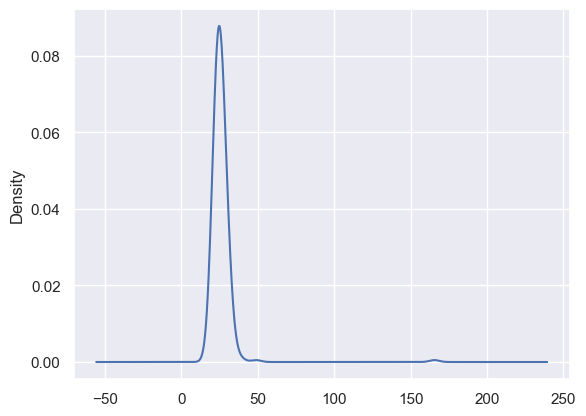

In [165]:
fat = pd.read_csv('data/bodyfat.csv')
fat = fat.drop('Unnamed: 0', axis=1)
fat.Weight = fat.Weight * 0.453592 # Convert to Kg
fat.Height = fat.Height * 0.0254 # convert inches to m
fat['BMI'] = fat.Weight / (fat.Height**2)
fat.BMI.plot.kde();

### 3a. [5 pts]
The BMI has at least one outlier since it's unlikely anyone has a BMI of 165, even [Arnold Schwarzenegger](http://www.health.com/health/gallery/0,,20460621,00.html).

Form a new table `cfat` (cleaned fat) that removes any rows with a BMI greater than 40 and calculate the regression model predicting the `Density` from the `BMI`. Display the summary of the regression model. Call your model as `bmi`. You should achieve an $R^2$ of at least 0.53.

In [170]:
# form new table cfat and model bmi
# cfat = 
# bmi = 
# your code here

cfat = fat[fat['BMI'] <= 40]
bmi = smf.ols('Density ~ BMI', data=cfat).fit()
print(bmi.summary())


                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     286.2
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           3.25e-43
Time:                        14:46:19   Log-Likelihood:                 734.17
No. Observations:                 250   AIC:                            -1464.
Df Residuals:                     248   BIC:                            -1457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1602      0.006    186.410      0.0

In [171]:
# tests your bmi model 

### 3b. [Peer Review]
Plot your regression model against the BMI measurement, properly labeling the scatterplot axes and showing the regression line. In subsequent models, you will not be able to plot the Density *vs* your predictors because you will have too many predictors, but it's useful to visually understand the relationship between the BMI predictor and the `Density` because you should find that the regression line goes through the data but there is too much variability in the data to achieve a good $R^2$.
Upload a copy or screensho of your plot for this week's Peer Review assignment. 

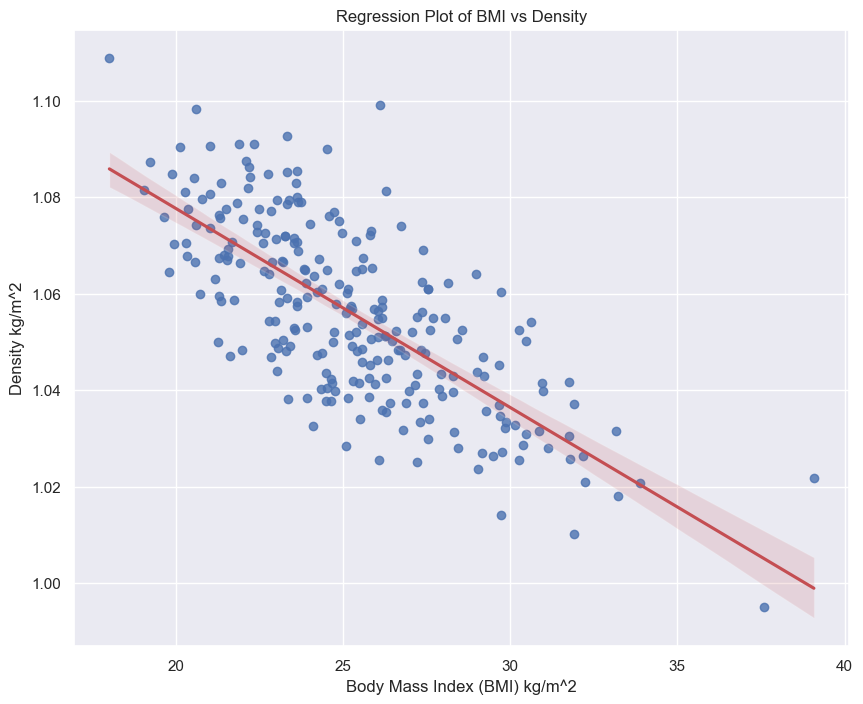

In [177]:
plt.figure(figsize=(10, 8))

sns.regplot(data=cfat, x='BMI', y='Density', line_kws=dict(color="r"))

plt.xlabel("Body Mass Index (BMI) kg/m^2")
plt.ylabel("Density kg/m^2")
plt.title("Regression Plot of BMI vs Density")
plt.show()


 The `BMI` model uses easy-to-measure predictors, but has a poor $R^2 \sim 0.54$. We will use structured subset selection methods from ISLR Chapter 6.1 to derive two better predictors. That chapter covers *best subset*, *forward stepwise* and *backware stepwise* selection. I have implemented the *best subset* selection which searches across all combinations of $1, 2, \ldots, p$ predictors and selects the best predictor based on the $\textit{adjusted}~R^2$ metric. This method involved analyzing $2^{13} = 8192$ regression models (programming and computers for the win). The resulting $\textit{adjusted}~R^2$ plot is shown below (Since the data split can be different, your result may look slightly different):
 
 <img src='fat-best-rsqadj.png'>
 
In this plot, `test_fat` and `train_fat` datasets each containing 200 randomly selected samples were derived from the `cfat` dataset using `np.random.choice` over the `cfat.index` and selected using the Pandas `loc` method. Then, following the algorithm of ISLR Algorithm 6.1 *Best Subset Selection*, all $p \choose k$ models with $k$ predictors were evaluated on the training data and the model returning the best $\textit{Adjusted}~R^2$ was selected. These models are indicated by the data points for the solid blue line. As the text indicates, other measures (AIC, BIC, $C_p$) would be better than the $\textit{Adjusted}~R^2$, but we use it becuase because you've already seen the $R^2$ and should have an understanding of what it means.

Then, the best models for each $k$ were evaluated for the `test_fat` data. These results are shown as the red dots below the blue line. Note that because the test and train datasets are randomly selected subsets, the results vary from run-to-run and it may that your test data produces better $R^2$ than your training data.

In the following exercises, you can not use the `Density`, `Fat` or `BMI` columns in your predictive models. You can only use the 13 predictors in the `allowed_factors` list.

In [178]:
allowed_factors = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

## Forward Stepwise Refinement

You will manually perform the steps of the *forward stepwise selection* method for four parameters. You will do this following Algorithm 6.2 from ISLR. For $k = 1\ldots 4$:
* Set up a regression model with $k$ factors that involves the fixed predictors from the previous step $k-1$
* Try all $p$ predictors in the new $k$th position
* Select the best parameter using $\textit{Adjusted}-R^2$ (e.g. `model.rsquared_adj`) given your training data
* Fix the new parameter and continue the process for $k+1$

Then, you will construct a plot similar to the one above, plotting the $\textit{Adjusted}-R^2$ for each of your $k$ steps and plotting the $\textit{Adjusted}-R^2$ from the test set using that model.

### 3c. [5 pts]
First, construct your training and test sets from your `cfat` dataset. Call the resulting data frame to train_fat and test_fat. train_fat includes randomly selected 125 observations and the test_fat has the rest.

Note: Set **random_state = 0** in sklearn's split function

In [182]:
from sklearn.model_selection import train_test_split

train_fat,test_fat = train_test_split(cfat, train_size = 125, random_state=0)
print(len(train_fat),len(test_fat))

125 125


In [183]:
# tests your training and test sets 

### 3d. Conduct the algorithm above for $k=1$, leaving your best solution as the answer [5 pts]
Call your resulting model `train_bmi1`.

In [227]:
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Age 0.11891818526391718
Weight 0.3118316510507503
Height 0.01360449953514542
Neck 0.23659704375100232
Chest 0.48319067404353433
Abdomen 0.6569981103212712
Hip 0.3096110044465227
Thigh 0.2052343726511262
Knee 0.14348108465750486
Ankle 0.08478533257962151
Biceps 0.23065760452385475
Forearm 0.0897400332336078
Wrist 0.10016498175577249
best: ['Abdomen', np.float64(0.6569981103212712)]


In [228]:
# uncomment and update your solution
formula_k1 = 'Density ~ '+ best[0]
train_bmi1 = smf.ols(formula=formula_k1, data = train_fat).fit()
print(train_bmi1.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     235.6
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.32e-30
Time:                        16:27:19   Log-Likelihood:                 380.21
No. Observations:                 125   AIC:                            -756.4
Df Residuals:                     123   BIC:                            -750.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1961      0.009    130.307      0.0

In [229]:
# tests train_bmi1 model 

### 3e. Conduct the algorithm above for $k=2$, leaving your best solution as the answer [Peer Review]
Name your model object as `train_bmi2`.<br>
Look at this week's Peer Review assignment for questions about $k=2$ through $k=5$. 

In [238]:
from sklearn.metrics import r2_score

def add_factor(formula, allowed_factors = allowed_factors,  data = train_fat):
    best = ['','',0]
    for p in allowed_factors:
        if p not in formula:
            formula_k = formula + ' + ' + p
            model  = smf.ols(formula=formula_k, data=data).fit()
            if model.rsquared_adj>best[2]:
                best = [model, formula_k, float(model.rsquared_adj)]

    return best

def calc_test_adjR2(model, data = test_fat):
    y_test = data['Density']
    y_pred = model.predict(data)
    # R² on test set
    r2 = r2_score(y_test, y_pred)
    # Compute adjusted R²
    n = len(y_test)                      # number of observations
    p = model.df_model                  # number of predictors (excludes intercept)
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return r2_adj

# initialize dictionary
k_dict = {}
k_dict[1] = [formula_k1, float(train_bmi1.rsquared_adj), calc_test_adjR2(train_bmi1)]

best = add_factor(formula_k1, allowed_factors, data=train_fat)
best.append(calc_test_adjR2(best[0]))

formula_k2 = best[1]
train_bmi2 = best[0]
k_dict[2] = [best[1], best[2], best[3]]
print(train_bmi2.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           7.81e-36
Time:                        16:37:19   Log-Likelihood:                 396.16
No. Observations:                 125   AIC:                            -786.3
Df Residuals:                     122   BIC:                            -777.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2084      0.008    144.306      0.0

### 3f. Conduct the algorithm above for $k=3$, leaving your best solution as the answer [Peer Review]

In [239]:
best = add_factor(formula_k2, allowed_factors, data=train_fat)
best.append(calc_test_adjR2(best[0]))

formula_k3 = best[1]
train_bmi3 = best[0]
k_dict[3] = [best[1], best[2], best[3]]
print(train_bmi3.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     121.2
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           2.64e-36
Time:                        16:37:21   Log-Likelihood:                 400.07
No. Observations:                 125   AIC:                            -792.1
Df Residuals:                     121   BIC:                            -780.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2348      0.012     98.987      0.0

### 3g. Conduct the algorithm above for $k=4$, leaving your best solution as the answer [Peer Review]

In [240]:
best = add_factor(formula_k3, allowed_factors, data=train_fat)
best.append(calc_test_adjR2(best[0]))

formula_k4 = best[1]
train_bmi4 = best[0]
k_dict[4] = [best[1], best[2], best[3]]
print(train_bmi4.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     94.30
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           4.24e-36
Time:                        16:37:23   Log-Likelihood:                 402.18
No. Observations:                 125   AIC:                            -794.4
Df Residuals:                     120   BIC:                            -780.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1948      0.023     51.329      0.0

### 3h. Conduct the algorithm above for $k=5$, leaving your best solution as the answer [Peer Review]

In [241]:
best = add_factor(formula_k4, allowed_factors, data=train_fat)
best.append(calc_test_adjR2(best[0]))

formula_k5 = best[1]
train_bmi5 = best[0]
k_dict[5] = [best[1], best[2], best[3]]
print(train_bmi5.summary())

                            OLS Regression Results                            
Dep. Variable:                Density   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     78.63
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           4.67e-36
Time:                        16:37:27   Log-Likelihood:                 404.55
No. Observations:                 125   AIC:                            -797.1
Df Residuals:                     119   BIC:                            -780.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1362      0.036     31.887      0.0

### 3i. Plot [5 pts]
Plot your resulting $\textit{adjusted}~R^2$ *vs* number of predictors (k=1,2,3,4,5) and overlay the $\textit{adjusted}~R^2$ for the test data. Call the list of the five adjusted r-squared values from the five train_bmi# models as `adjr2_train` and the one from the test data as `adjr2_test`.

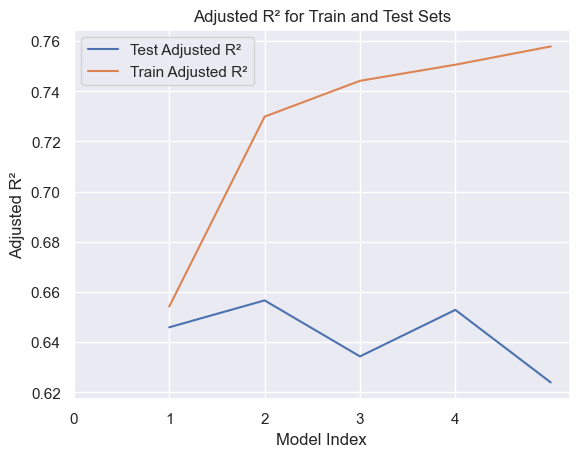

In [260]:
# plot resulting adjusted rsquared vs number of predictors (k=1,2,3,4,5)
# overlay the adjusted rsquared for the test data 
# your code here
plot_df = pd.DataFrame.from_dict(k_dict, orient='index')
plot_df.rename(columns={0:'formula',1:'adjr2_train',2:'adjr2_test'}, inplace=True)
adjr2_train = plot_df['adjr2_train'].to_list()
adjr2_test = plot_df['adjr2_test'].to_list()

sns.lineplot(data=plot_df, x=plot_df.index, y='adjr2_test', label='Test Adjusted R²')
sns.lineplot(data=plot_df, x=plot_df.index, y='adjr2_train', label='Train Adjusted R²')

plt.legend(loc='best')  # Optional: 'best' automatically places it nicely
plt.title('Adjusted R² for Train and Test Sets')
plt.xlabel('Model Index')  # Optional: customize as needed
plt.ylabel('Adjusted R²')
plt.xticks(ticks=range(len(plot_df)))
plt.show()


In [261]:
# tests adjusted r-squared plot vs. number of factors 

### 3j. Discussion [Peer Review]
The BMI model has the benefit being simple (two measurements, height and wright). Looking at your resulting regression model, how many parameters would you suggest to use for your enhanced BMI model? Justify your answer using your models. Submit your answer with this week's Peer Review assignment.